# Udemy EDA (Exprolring Data Analysis)

### Import libraries 

In [939]:
import numpy as na
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load & insepect data

In [941]:
df = pd.read_csv('udemy courses raw.csv')

In [942]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1526,178044,How To Make Graphics For A Website,https://www.udemy.com/how-to-make-graphics-for...,True,200,24857,35,11,All Levels,1.5,2014-03-15T21:53:19Z,Graphic Design


In [943]:
df.shape

(3678, 12)

In [944]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [945]:
round(df.describe(), 2)

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.00,3678.00,3678.00,3678.00,3678.00,3678.00
mean,675971.96,66.05,3197.15,156.26,40.11,4.09
std,343273.16,61.01,9504.12,935.45,50.38,6.05
min,8324.00,0.00,0.00,0.00,0.00,0.00
25%,407692.50,20.00,111.00,4.00,15.00,1.00
50%,687917.00,45.00,911.50,18.00,25.00,2.00
75%,961355.50,95.00,2546.00,67.00,45.75,4.50
max,1282064.00,200.00,268923.00,27445.00,779.00,78.50


## Preprocessing data

### Categrical data

In [948]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [949]:
df['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [950]:
df['is_paid'].value_counts()

is_paid
True     3368
False     310
Name: count, dtype: int64

In [951]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3673    2016-06-14T17:36:46Z
3674    2017-03-10T22:24:30Z
3675    2015-12-30T16:41:42Z
3676    2016-08-11T19:06:15Z
3677    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3678, dtype: object

In [952]:
## type casting from object to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [953]:
df['published_timestamp']

0      2017-01-18 20:58:58+00:00
1      2017-03-09 16:34:20+00:00
2      2016-12-19 19:26:30+00:00
3      2017-05-30 20:07:24+00:00
4      2016-12-13 14:57:18+00:00
                  ...           
3673   2016-06-14 17:36:46+00:00
3674   2017-03-10 22:24:30+00:00
3675   2015-12-30 16:41:42+00:00
3676   2016-08-11 19:06:15+00:00
3677   2014-09-28 19:51:11+00:00
Name: published_timestamp, Length: 3678, dtype: datetime64[ns, UTC]

### add new column from date

In [955]:
df['year'] = df['published_timestamp'].dt.year
df['month'] = df['published_timestamp'].dt.month_name()
df['day'] = df['published_timestamp'].dt.day_name()
df['quarter'] = df['published_timestamp'].dt.quarter

In [956]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day,quarter
1326,1007622,Infodesign,https://www.udemy.com/infodesign/,True,50,2,1,12,Beginner Level,1.5,2017-03-24 00:39:48+00:00,Graphic Design,2017,March,Friday,1


In [957]:
df.groupby(df['year']).count()['subject']

year
2011       5
2012      45
2013     202
2014     491
2015    1014
2016    1206
2017     715
Name: subject, dtype: int64

## Change index to date

In [959]:
df.set_index(df['published_timestamp'], inplace=True)

In [960]:
df['profit'] = df['price'] * df['num_subscribers']

In [961]:
df['course_id'].nunique()

3672

In [962]:
df['course_id'].duplicated()

published_timestamp
2017-01-18 20:58:58+00:00    False
2017-03-09 16:34:20+00:00    False
2016-12-19 19:26:30+00:00    False
2017-05-30 20:07:24+00:00    False
2016-12-13 14:57:18+00:00    False
                             ...  
2016-06-14 17:36:46+00:00    False
2017-03-10 22:24:30+00:00    False
2015-12-30 16:41:42+00:00    False
2016-08-11 19:06:15+00:00    False
2014-09-28 19:51:11+00:00    False
Name: course_id, Length: 3678, dtype: bool

In [963]:
df.duplicated().sum()

6

In [964]:
df[df.duplicated()]


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day,quarter,profit
published_timestamp,,,,,,,,,,,,,,,,,
2016-05-16 18:28:30+00:00,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance,2016,May,Monday,2,0
2017-04-23 16:19:01+00:00,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017,April,Sunday,2,0
2016-12-15 14:56:17+00:00,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance,2016,December,Thursday,4,0
2017-07-02 14:29:35+00:00,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance,2017,July,Sunday,3,0
2014-04-15 21:48:55+00:00,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design,2014,April,Tuesday,2,0
2013-01-03 00:55:31+00:00,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development,2013,January,Thursday,1,3246375


In [965]:
## drop dublicated
df.drop_duplicates(inplace=True)

In [966]:
df.duplicated().sum()

0

In [967]:
df.isna().sum()



course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
year                   0
month                  0
day                    0
quarter                0
profit                 0
dtype: int64

In [968]:
## content_duration is numric but in real its catgerical
df['content_duration'].value_counts()

content_duration
1.000000     606
1.500000     506
2.000000     419
2.500000     269
3.000000     248
            ... 
0.483333       1
78.500000      1
70.000000      1
0.000000       1
66.500000      1
Name: count, Length: 105, dtype: int64

In [969]:
df['content_duration'].sort_values()


published_timestamp
2015-12-17 05:38:38+00:00     0.000000
2017-05-01 18:50:43+00:00     0.133333
2016-10-10 21:05:19+00:00     0.316667
2015-03-27 17:16:21+00:00     0.450000
2015-12-07 18:36:33+00:00     0.466667
                               ...    
2013-10-16 11:37:30+00:00    68.500000
2014-03-07 15:13:45+00:00    70.000000
2014-12-22 16:57:30+00:00    71.500000
2015-11-09 22:01:02+00:00    76.500000
2016-10-11 21:40:06+00:00    78.500000
Name: content_duration, Length: 3672, dtype: float64

In [970]:
df['duration'] = pd.qcut(df['content_duration'],6, ['0:1','1:3','3:7','7:12','12:20','+20'])

In [971]:
df.sample()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day,quarter,profit,duration
published_timestamp,,,,,,,,,,,,,,,,,,
2016-04-27 17:58:22+00:00,829616,Aprendiendo Piano: Ejercicios de calentamiento,https://www.udemy.com/aprendiendo-piano-ejerci...,False,0,1876,109,11,Beginner Level,0.55,2016-04-27 17:58:22+00:00,Musical Instruments,2016,April,Wednesday,2,0,0:1


In [972]:
## rename df['duration']
df.rename(columns={'duration': 'duration_category'}, inplace=True)

In [973]:
df['duration_category']

published_timestamp
2017-01-18 20:58:58+00:00     1:3
2017-03-09 16:34:20+00:00     +20
2016-12-19 19:26:30+00:00    7:12
2017-05-30 20:07:24+00:00    7:12
2016-12-13 14:57:18+00:00     3:7
                             ... 
2016-06-14 17:36:46+00:00     3:7
2017-03-10 22:24:30+00:00    7:12
2015-12-30 16:41:42+00:00    7:12
2016-08-11 19:06:15+00:00    7:12
2014-09-28 19:51:11+00:00     3:7
Name: duration_category, Length: 3672, dtype: category
Categories (6, object): ['0:1' < '1:3' < '3:7' < '7:12' < '12:20' < '+20']

In [974]:
##delete on of dublicated column
#df.iloc[:,17]
df = df.drop(df.columns[17], axis=1)

### price column

In [976]:
#df['price'].value_counts()
df['price'].max()

200

In [977]:
labels = ['0:20', '20:50', '50:100', '100:200']
bins = [0, 20, 50, 100, 200] 
df['price_category'] =pd.cut(df['price'], bins=bins, labels=labels)

In [1002]:
##using reblace fynction

#df['price_category'].replace('0:20', '0:20', inplace=True)
df['price_category'].replace({'0:20':'0 to 20',
                              '20:50':'20 to 50',
                              '50:100':'50 to 100',
                              '100:200':'100 to 200'}, inplace=True)


In [979]:
df['price_category']

published_timestamp
2017-01-18 20:58:58+00:00    100 to 200
2017-03-09 16:34:20+00:00     50 to 100
2016-12-19 19:26:30+00:00      20 to 50
2017-05-30 20:07:24+00:00     50 to 100
2016-12-13 14:57:18+00:00    100 to 200
                                ...    
2016-06-14 17:36:46+00:00     50 to 100
2017-03-10 22:24:30+00:00      20 to 50
2015-12-30 16:41:42+00:00      20 to 50
2016-08-11 19:06:15+00:00      20 to 50
2014-09-28 19:51:11+00:00      20 to 50
Name: price_category, Length: 3672, dtype: category
Categories (4, object): ['0 to 20' < '20 to 50' < '50 to 100' < '100 to 200']

### Explorality data analysis(EDA)
#### univariate analysis
#### bi- variate analysis
#### multi-variate analysis¶

\#### using pandas-profiling for EDA

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(df)

### Subject column
#### 1-univariate analysis 

### how many courses in each subject

In [ ]:
df['subject'].describe()

In [ ]:
#df['subject'].value_counts()
#df['subject'].value_counts().plot(kind='bar')
df['subject'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=100)


In [ ]:
df['subject'].hist()

### Subject column
#### 2-bi-vraint analysis 

In [ ]:
df.sample(2)

### number of subscriber for each subject

In [ ]:
num = df['num_subscribers'].groupby(df['subject']).sum()
num

#### use plotly.express for visualization

In [ ]:
#num.plot(kind='pie',autopct='%1.1f%%')


In [ ]:

fig = px.bar(data_frame=df['num_subscribers'].groupby(df['subject']).sum().reset_index(),
            x='subject',
            y='num_subscribers',
             title='Number of Subscribers per Subject',
             labels={'subject': 'Subject',
                     'num_subscribers': 'Number of Subscribers'},
             color='subject',
             text='num_subscribers'  
            )
fig

### total profit for each subject

In [990]:
df['profit'].groupby(df['subject'],).sum().sort_values(ascending=False)

subject
Web Development        627597400
Business Finance       123735315
Graphic Design          76983170
Musical Instruments     53359055
Name: profit, dtype: int64

In [ ]:
df['profit'].groupby(df['subject']).sum().reset_index()

In [ ]:
#df['profit'].groupby(df['subject']).sum().reset_index()
#px.bar(df['profit'].groupby(df['subject']).sum().reset_index(), 'subject', 'profit')

In [ ]:
#df['profit'].groupby(df['subject']).sum()
#px.bar(df, df['profit'].groupby(df['subject']).sum().index, df['profit'].groupby(df['subject']).sum().values)

C:\Users\asd\AppData\Local\Temp\ipykernel_6972\2002905019.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




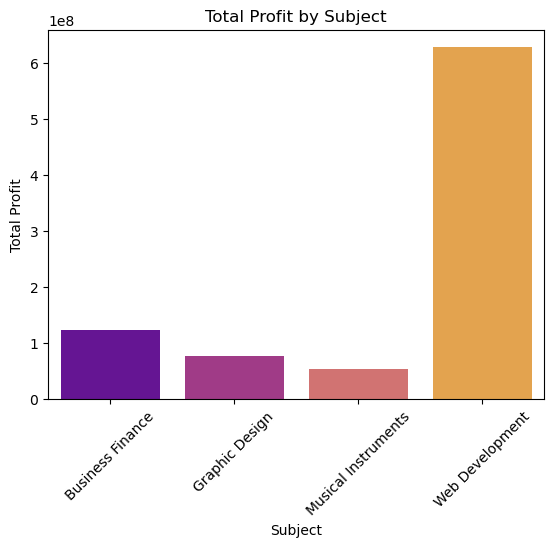

<Figure size 2000x2000 with 0 Axes>

In [1004]:
# Group by 'subject' and sum the 'profit'
profit_by_subject = df['profit'].groupby(df['subject']).sum().reset_index()

# Create the barplot
sns.barplot(data=profit_by_subject, x='subject', y='profit',palette='plasma')
# Add a title and labels
plt.title('Total Profit by Subject')
plt.xlabel('Subject')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.figure(figsize=(20,20))
plt.show()


#### number od paid and unpaid subject

In [ ]:
#df.groupby('subject').sum()
df['is_paid'].value_counts()  #total
(df['is_paid']==1).groupby(df['subject']).sum()   # num of paid as is baid is bool
(df['is_paid']==0).groupby(df['subject']).sum().sort_values()   # num of unpaid as is baid is bool
df[df['is_paid']==0]['subject'].value_counts()#samw above

### Subject columnm
#### multi-variate analysis

In [ ]:
#### number of paid and unpaid cources in each sbject

In [ ]:
#df['subject'].value_counts().plot(kind='bar')
#sns.countplot(data=df,x=df['subject'], palette='viridis')

subject_counts = df['subject'].value_counts().reset_index()
fig = px.bar(data_frame=subject_counts,
             x='subject',
            y='count',
            title='Number of Courses per Subject',
             color='subject',
             labels={'subject': 'Subject', 'count': 'Number of Courses'},
            text='count')    
fig

#### number of paid and unpaid cources in each sbject using sns.countplot and px.bar

In [ ]:
#sns.countplot(data=df,x=df['subject'],hue='is_paid', palette='viridis')

fig = px.bar(data_frame=df,
             x='subject',
           
            title='Number of Courses per Subject',
             color='is_paid',
             labels={'subject': 'Subject', 'count': 'Number of Courses'} ,
             color_discrete_sequence=['#635EFA', '#EF523B'] # You can customize the colors here
            )
fig

### Number of Courses per Subject by 	duration_category and price category 

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x=df['subject'],hue='duration_category', palette='viridis')
plt.title('Number of Courses per Subject')
plt.xlabel('subject')
plt.ylabel('number of courses')

<Axes: xlabel='subject', ylabel='count'>

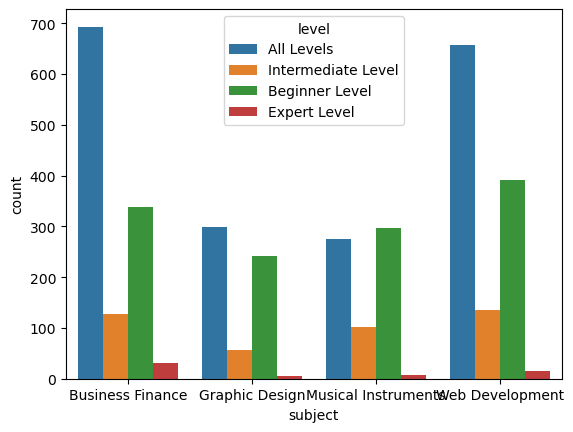

In [986]:
#px.scatter_3d()
sns.countplot(df,x=df['subject'], hue=df['level'])

### using pivot table to get sum of num of revews and averge of num oof subscribers for each level  and group by whether the course is paid

In [1027]:
 pd.pivot_table(
    df,
    values=['num_subscribers', 'num_reviews'], 
    index='level',                             
    columns='is_paid',                       
    aggfunc={'num_subscribers': 'mean',    
             'num_reviews': 'sum'},             
    fill_value=0                               
)

num_reviews         num_subscribers             
is_paid                  False   True            False        True 
level                                                              
All Levels               60590  343182    13351.360656  2907.889628
Beginner Level           64747   64328    11027.411392  2080.641441
Expert Level                 0    2333        0.000000   865.448276
Intermediate Level        6701   32315     6810.933333  1375.132992

### in each year wat total  profit made be each subject

In [1040]:
df.groupby(['year', 'subject'], as_index=False)['profit'].sum()

,year,subject,profit
0,2011,Web Development,11643420
1,2012,Business Finance,190740
2,2012,Graphic Design,1329850
3,2012,Musical Instruments,766405
4,2012,Web Development,9486475
5,2013,Business Finance,7298950
6,2013,Graphic Design,3085300
7,2013,Musical Instruments,7479930
8,2013,Web Development,51541640
9,2014,Business Finance,35870820


### Profit for each subject

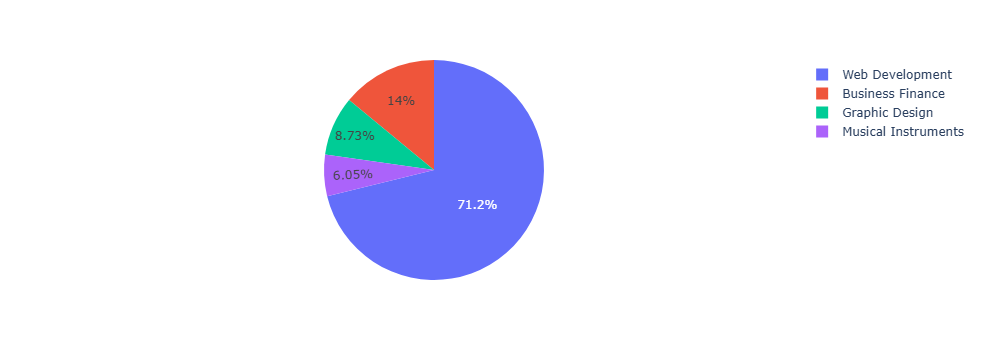

In [1067]:
px.pie(data_frame=df, names='subject', values='profit')

### profit of each year for each subjectm

<Axes: xlabel='year', ylabel='profit'>

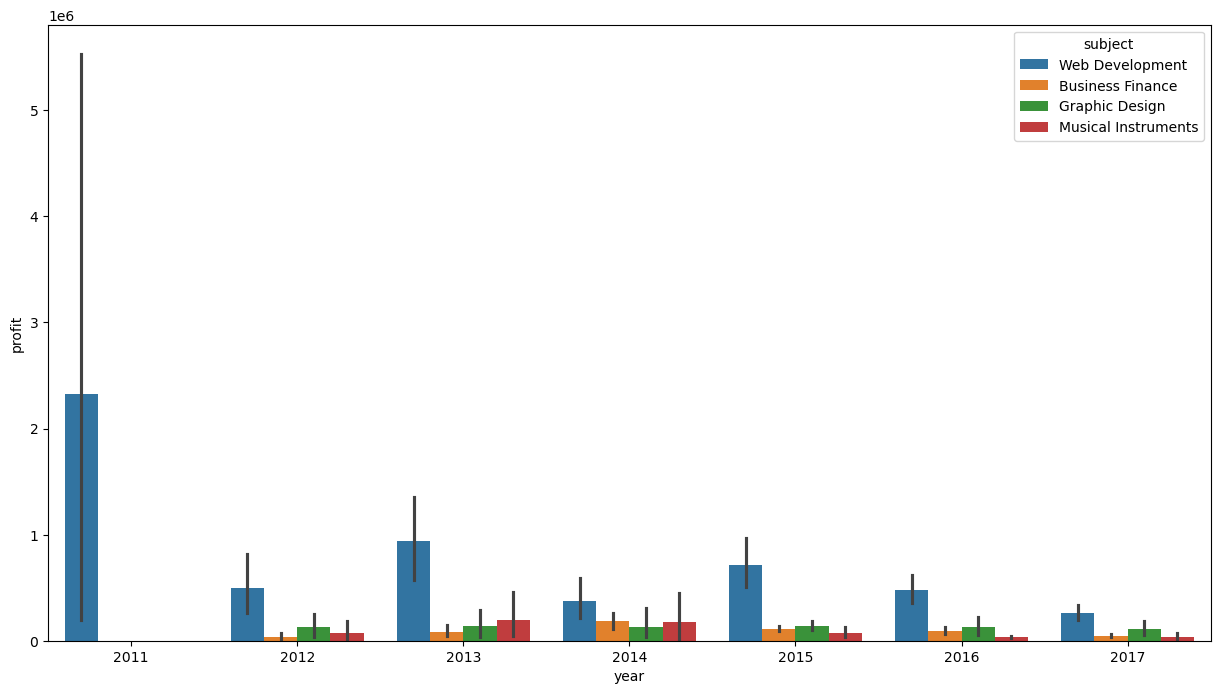

In [1071]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='year', y='profit', hue='subject')
